In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [17]:
# Load the data
df = pd.read_csv("countries.csv")
df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    object 
 1   Region                          188 non-null    object 
 2   Population (millions)           188 non-null    float64
 3   HDI                             172 non-null    float64
 4   GDP per Capita                  173 non-null    object 
 5   Cropland Footprint              173 non-null    float64
 6   Grazing Footprint               173 non-null    float64
 7   Forest Footprint                173 non-null    float64
 8   Carbon Footprint                173 non-null    float64
 9   Fish Footprint                  173 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        173 non-null    float64
 12  Grazing Land                    173 

In [19]:
# Creal the 'GDP per Capita' by removing $ and , and transform into float
df['GDP per Capita'] = df['GDP per Capita'].str.replace('$', '').str.replace(',', '').astype(float)
df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [20]:
# Sort df by "GDP per Capita"
df.sort_values('GDP per Capita', ascending = False)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
102,Luxembourg,European Union,0.52,0.89,114665.0,1.10,0.76,1.03,12.65,0.13,...,0.57,0.08,0.89,0.00,0.14,1.68,-14.14,9.14,9.44,5
128,Norway,Northern/Eastern Europe,4.99,0.94,100172.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.18,3.19,2.88,0.61,4
138,Qatar,Middle East/Central Asia,2.05,0.85,99431.5,0.57,0.27,0.15,9.57,0.19,...,0.01,0.00,0.00,1.17,0.06,1.24,-9.56,6.24,8.72,3L
163,Switzerland,Northern/Eastern Europe,8.00,0.93,88506.2,0.75,0.22,0.38,4.26,0.07,...,0.32,0.12,0.74,0.01,0.12,1.30,-4.48,3.34,4.44,6
18,Bermuda,North America,0.06,NaN,70626.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.13,-5.64,3.33,44.05,3T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,New Caledonia,Asia-Pacific,0.25,NaN,NaN,0.68,0.62,0.18,1.78,0.32,...,0.07,0.31,1.94,5.35,0.00,7.67,4.09,2.07,0.47,3L
139,Réunion,Africa,0.86,NaN,NaN,0.14,0.01,0.15,3.27,0.09,...,0.14,0.01,0.04,0.00,0.00,0.18,-3.47,2.11,20.18,5
156,Somalia,Africa,10.20,NaN,NaN,0.16,0.43,0.52,0.07,0.01,...,0.09,0.56,0.22,0.33,0.06,1.27,0.03,0.71,0.98,5
164,Syrian Arab Republic,Middle East/Central Asia,21.89,0.62,NaN,0.52,0.09,0.04,0.81,0.01,...,0.41,0.10,0.04,0.00,0.05,0.60,-0.91,0.87,2.50,5


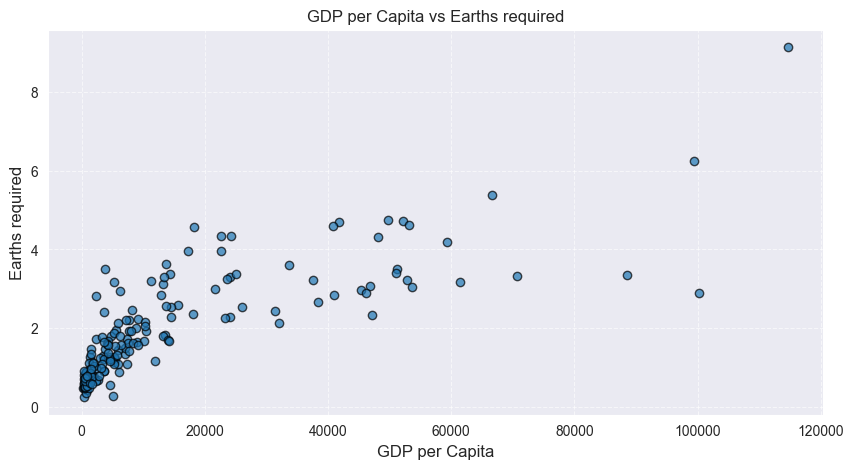

In [21]:
# Scatter plot for GDP per Capita vs Earths Required
plt.figure(figsize = (10,5))
plt.scatter(df['GDP per Capita'],
            df['Earths Required'],
            alpha = 0.7,
            edgecolors= "black")
plt.xlabel('GDP per Capita', fontsize = 12)
plt.ylabel('Earths required', fontsize = 12)
plt.title('GDP per Capita vs Earths required')
plt.grid(True, alpha = 0.6, linestyle = "--")
plt.show()

# Normal Linear Regression

In [23]:
# Remove NAs in our df if present in the 2 variables
df_clean = df.dropna(subset = ["GDP per Capita", "Earths Required"])
df_clean.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [24]:
# Isolate X and Y + add_constant
X = df_clean['GDP per Capita']
y = df_clean['Earths Required']
X = sm.add_constant(X)
X.head()

,const,GDP per Capita
0,1.0,614.66
1,1.0,4534.37
2,1.0,5430.57
3,1.0,4665.91
4,1.0,13205.10


In [25]:
# Fit the model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Earths Required   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     302.6
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           1.13e-39
Time:                        09:45:54   Log-Likelihood:                -208.23
No. Observations:                 173   AIC:                             420.5
Df Residuals:                     171   BIC:                             426.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1608      0.075     15.551      0.000       1.013       1.308
GDP per Capita   5.14e-05   2.96e-06     17.395      0.000    4.56e-05    5.72e-05
==============================================================================
Omnibus:                       15.842   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.196
Skew:                           0.334   Prob(JB):                     8.37e-09
Kurtosis:                       5.171   Cond. No.                     3.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

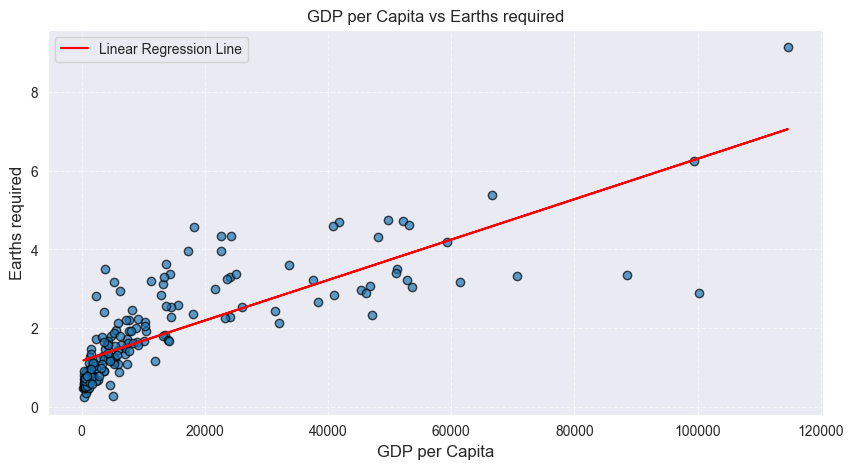

In [26]:
# Scatter Plot with Regression line for the GDP per capita vs Earths Required
plt.figure(figsize = (10,5))
plt.scatter(df_clean['GDP per Capita'],
            df_clean['Earths Required'],
            alpha = 0.7,
            edgecolors= "black")
plt.plot(df_clean["GDP per Capita"],
         model.predict(X),
         color = "red",
         label = "Linear Regression Line")
plt.xlabel('GDP per Capita', fontsize = 12)
plt.ylabel('Earths required', fontsize = 12)
plt.legend()
plt.title('GDP per Capita vs Earths required')
plt.grid(True, alpha = 0.6, linestyle = "--")
plt.show()

# Linear - Log

In [27]:
# Log transform the "GDP per Capita"
df_clean.loc[:,'GDP per Capita Log'] = np.log(df_clean['GDP per Capita'])
df_clean.head(2)

/var/folders/sg/1vlr_mz12nj80bfjc09d_f940000gn/T/ipykernel_72065/3577642466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'GDP per Capita Log'] = np.log(df_clean['GDP per Capita'])


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,GDP per Capita Log
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6,6.421069
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6,8.419441


In [28]:
# Isolate X_log and add_constant
X_log = df_clean['GDP per Capita Log']
X_log = sm.add_constant(X_log)
X_log.head()

,const,GDP per Capita Log
0,1.0,6.421069
1,1.0,8.419441
2,1.0,8.599799
3,1.0,8.448038
4,1.0,9.488358


In [29]:
# Fit the model
model_log = sm.OLS(y, X_log).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:        Earths Required   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     349.9
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           3.25e-43
Time:                        09:48:54   Log-Likelihood:                -200.01
No. Observations:                 173   AIC:                             404.0
Df Residuals:                     171   BIC:                             410.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3885      0

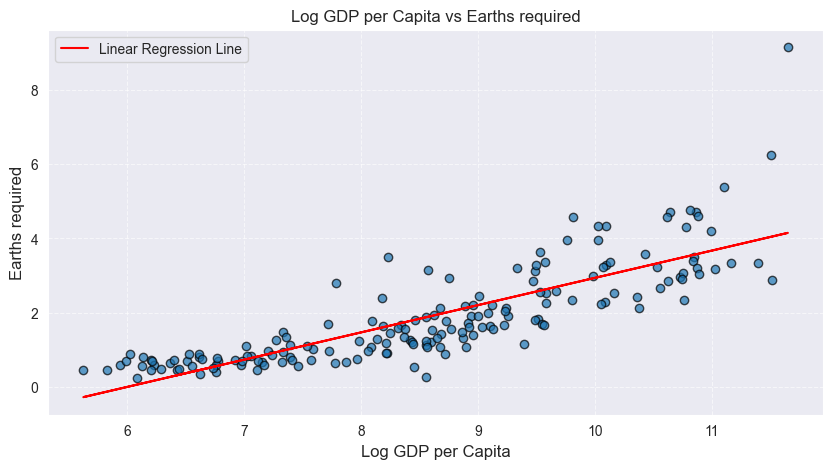

In [30]:
# Visualize the Regression with a scatter plot
plt.figure(figsize = (10,5))
plt.scatter(df_clean['GDP per Capita Log'],
            df_clean['Earths Required'],
            alpha = 0.7,
            edgecolors= "black")
plt.plot(df_clean["GDP per Capita Log"],
         model_log.predict(X_log),
         color = "red",
         label = "Linear Regression Line")
plt.xlabel('Log GDP per Capita', fontsize = 12)
plt.ylabel('Earths required', fontsize = 12)
plt.legend()
plt.title('Log GDP per Capita vs Earths required')
plt.grid(True, alpha = 0.6, linestyle = "--")
plt.show()

# Log - Linear

In [36]:
# Log transform Earts Required
df_clean.loc[:,'Earths Required Log'] = np.log(df_clean['Earths Required'])
df_clean.head(2)

/var/folders/sg/1vlr_mz12nj80bfjc09d_f940000gn/T/ipykernel_72065/1642197050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'Earths Required Log'] = np.log(df_clean['Earths Required'])


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,GDP per Capita Log,GDP per Capita Binary,Earths Required Log
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,0.00,0.04,0.50,-0.30,0.46,1.60,6,6.421069,0,-0.776529
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,0.07,0.06,1.18,-1.03,1.27,1.87,6,8.419441,0,0.239017


In [37]:
# Isolate y_log
y_log = df_clean['Earths Required Log']

# Fit the model
model_log_linear = sm.OLS(y_log, X).fit()
print(model_log_linear.summary())

                             OLS Regression Results                            
Dep. Variable:     Earths Required Log   R-squared:                       0.483
Model:                             OLS   Adj. R-squared:                  0.480
Method:                  Least Squares   F-statistic:                     159.8
Date:                 Fri, 16 Jan 2026   Prob (F-statistic):           2.74e-26
Time:                         10:02:20   Log-Likelihood:                -128.58
No. Observations:                  173   AIC:                             261.2
Df Residuals:                      171   BIC:                             267.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0630      0.0

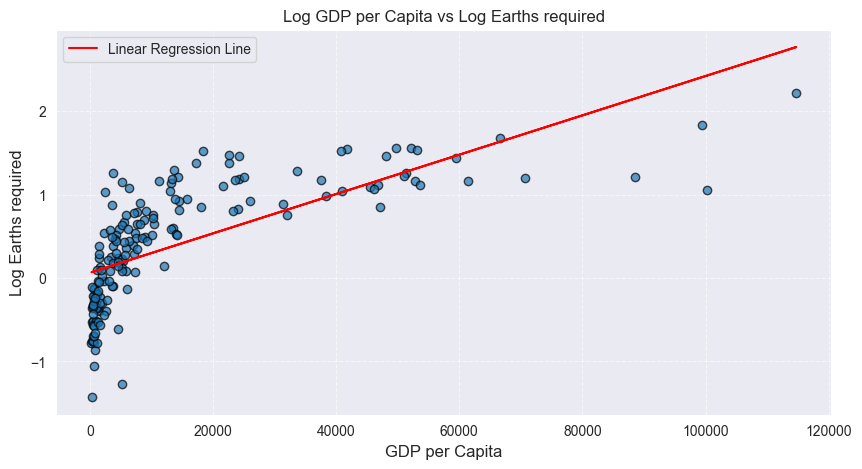

In [38]:
# Visualize the output of the regression + scatter plot
plt.figure(figsize = (10,5))
plt.scatter(df_clean['GDP per Capita'],
            df_clean['Earths Required Log'],
            alpha = 0.7,
            edgecolors= "black")
plt.plot(df_clean["GDP per Capita"],
         model_log_linear.predict(X),
         color = "red",
         label = "Linear Regression Line")
plt.xlabel('GDP per Capita', fontsize = 12)
plt.ylabel('Log Earths required', fontsize = 12)
plt.legend()
plt.title('Log GDP per Capita vs Log Earths required')
plt.grid(True, alpha = 0.6, linestyle = "--")
plt.show()

# Log - Binary Regression

In [40]:
# Create a binary split of GDP per Capita based on its Median
median_gdp = df_clean['GDP per Capita'].median()
df_clean['GDP per Capita Binary'] = np.where(df_clean['GDP per Capita'] >= median_gdp, 1, 0)
df_clean.head()

/var/folders/sg/1vlr_mz12nj80bfjc09d_f940000gn/T/ipykernel_72065/2810897122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['GDP per Capita Binary'] = np.where(df_clean['GDP per Capita'] >= median_gdp, 1, 0)


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,GDP per Capita Log,GDP per Capita Binary,Earths Required Log
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,0.00,0.04,0.50,-0.30,0.46,1.60,6,6.421069,0,-0.776529
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,0.07,0.06,1.18,-1.03,1.27,1.87,6,8.419441,0,0.239017
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,0.01,0.03,0.59,-1.53,1.22,3.61,5,8.599799,1,0.198851
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,0.26,0.04,2.55,1.61,0.54,0.37,6,8.448038,0,-0.616186
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.94,-4.44,3.11,5.70,2,9.488358,1,1.134623


In [41]:
# Isolate the X_binary and add_constant
X_binary = df_clean['GDP per Capita Binary']
X_binary = sm.add_constant(X_binary)
X_binary.head(2)

,const,GDP per Capita Binary
0,1.0,0
1,1.0,0


In [42]:
# Fit the model
model_binary = sm.OLS(y_log, X_binary).fit()
print(model_binary.summary())

                             OLS Regression Results                            
Dep. Variable:     Earths Required Log   R-squared:                       0.560
Model:                             OLS   Adj. R-squared:                  0.558
Method:                  Least Squares   F-statistic:                     217.9
Date:                 Fri, 16 Jan 2026   Prob (F-statistic):           2.50e-32
Time:                         10:03:50   Log-Likelihood:                -114.58
No. Observations:                  173   AIC:                             233.2
Df Residuals:                      171   BIC:                             239.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

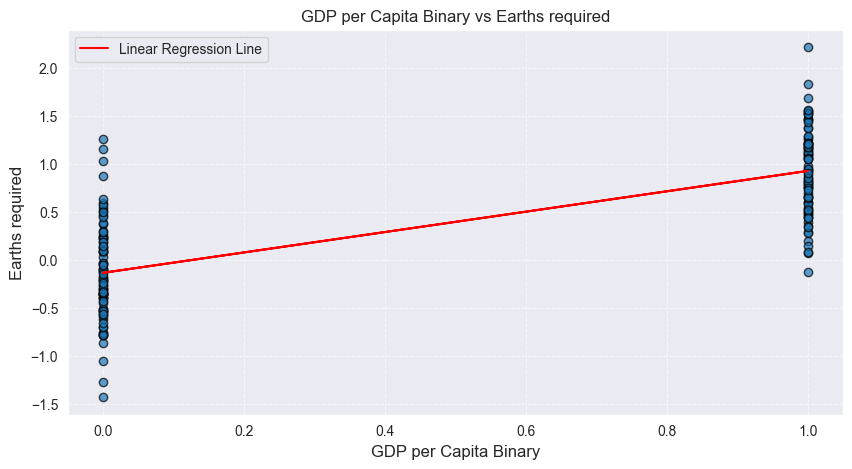

In [43]:
# Plot the Scatterplot + Regression line of the log-binary
plt.figure(figsize = (10,5))
plt.scatter(df_clean['GDP per Capita Binary'],
            df_clean['Earths Required Log'],
            alpha = 0.7,
            edgecolors= "black")
plt.plot(df_clean["GDP per Capita Binary"],
         model_binary.predict(X_binary),
         color = "red",
         label = "Linear Regression Line")
plt.xlabel('GDP per Capita Binary', fontsize = 12)
plt.ylabel('Earths required', fontsize = 12)
plt.legend()
plt.title('GDP per Capita Binary vs Earths required')
plt.grid(True, alpha = 0.6, linestyle = "--")
plt.show()

In [44]:
np.exp(model_binary.params)

const                    0.874464
GDP per Capita Binary    2.884707
dtype: float64

# Log - Log Regression

In [46]:
# Fit the log log model
model_log_log = sm.OLS(y_log, X_log).fit()
print(model_log_log.summary())

                             OLS Regression Results                            
Dep. Variable:     Earths Required Log   R-squared:                       0.772
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     577.8
Date:                 Fri, 16 Jan 2026   Prob (F-statistic):           1.00e-56
Time:                         10:06:38   Log-Likelihood:                -57.905
No. Observations:                  173   AIC:                             119.8
Df Residuals:                      171   BIC:                             126.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1

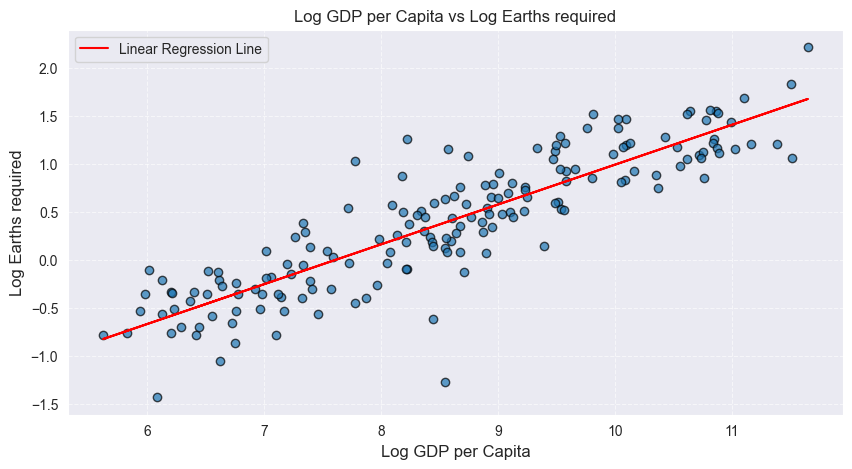

In [47]:
# Plot the log log model with the scatter plot
plt.figure(figsize = (10,5))
plt.scatter(df_clean['GDP per Capita Log'],
            df_clean['Earths Required Log'],
            alpha = 0.7,
            edgecolors= "black")
plt.plot(df_clean["GDP per Capita Log"],
         model_log_log.predict(X_log),
         color = "red",
         label = "Linear Regression Line")
plt.xlabel('Log GDP per Capita', fontsize = 12)
plt.ylabel('Log Earths required', fontsize = 12)
plt.legend()
plt.title('Log GDP per Capita vs Log Earths required')
plt.grid(True, alpha = 0.6, linestyle = "--")
plt.show()